In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

print(f"Tensorflow version: {tf.version.VERSION}")
tf.config.experimental.list_physical_devices('GPU')

Tensorflow version: 2.8.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras import optimizers, losses, metrics

In [3]:
UFC_Data = pd.read_csv('./ufc-master.csv')
UFC_Data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Uriah Hall,Sean Strickland,175,-210,175.000000,47.619048,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,5.0,5:00,1500.0,650.0,225.0,2500.0,800.0,275.0,165.0
1,Cheyanne Buys,Gloria de Paula,-145,125,68.965517,125.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Red,...,Kick,1.0,1:00,60.0,100.0,200.0,800.0,1400.0,900.0,900.0
2,Niklas Stolze,Jared Gooden,-180,155,55.555556,155.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,Punch,1.0,1:08,68.0,180.0,300.0,600.0,1200.0,300.0,600.0
3,Collin Anglin,Melsik Baghdasaryan,135,-155,135.000000,64.516129,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,Kick,2.0,1:50,410.0,240.0,250.0,1000.0,850.0,650.0,225.0
4,Bryan Barberena,Jason Witt,-265,215,37.735849,215.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,300.0,500.0,550.0,750.0,120.0,850.0


In [4]:
#Where did i get this? from first project
def Categorize_Winner(df):
    df['Winner_Categorized'] = df['Winner'].astype('category')

    cat_columns = df.select_dtypes(['category']).columns
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
    return df

UFC_Data = Categorize_Winner(UFC_Data)
UFC_Data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,Winner_Categorized
0,Uriah Hall,Sean Strickland,175,-210,175.000000,47.619048,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,5.0,5:00,1500.0,650.0,225.0,2500.0,800.0,275.0,165.0,0
1,Cheyanne Buys,Gloria de Paula,-145,125,68.965517,125.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Red,...,1.0,1:00,60.0,100.0,200.0,800.0,1400.0,900.0,900.0,1
2,Niklas Stolze,Jared Gooden,-180,155,55.555556,155.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,1.0,1:08,68.0,180.0,300.0,600.0,1200.0,300.0,600.0,0
3,Collin Anglin,Melsik Baghdasaryan,135,-155,135.000000,64.516129,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,2.0,1:50,410.0,240.0,250.0,1000.0,850.0,650.0,225.0,0
4,Bryan Barberena,Jason Witt,-265,215,37.735849,215.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,3.0,5:00,900.0,300.0,500.0,550.0,750.0,120.0,850.0,0


In [5]:
#UFC_Data.isnull().sum()
df = pd.DataFrame(UFC_Data.dropna(axis='columns'))
df = pd.DataFrame(df.dropna())
df.head()


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,better_rank,Winner_Categorized
0,Uriah Hall,Sean Strickland,175,-210,175.000000,47.619048,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,2.54,-7.62,-7,1.98,0.1,0.74,1,1,Red,0
1,Cheyanne Buys,Gloria de Paula,-145,125,68.965517,125.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Red,...,5.08,10.16,0,-0.93,1.0,-0.48,1,1,neither,1
2,Niklas Stolze,Jared Gooden,-180,155,55.555556,155.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,0.00,5.08,-1,2.75,0.0,0.03,1,1,neither,0
3,Collin Anglin,Melsik Baghdasaryan,135,-155,135.000000,64.516129,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,0.00,-2.54,1,1.51,0.0,-2.75,1,1,neither,0
4,Bryan Barberena,Jason Witt,-265,215,37.735849,215.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,-5.08,-5.08,2,-2.63,0.9,6.25,1,1,neither,0


In [6]:
#Where did i get this? From first project.
non_num = []
for col in df:
    if df[col].dtypes != "float64" and df[col].dtypes != "int64":
        non_num.append(col)
non_num.remove("Winner_Categorized")
df = pd.DataFrame(df.drop(columns = non_num))
df.head()


,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,B_losses,...,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,Winner_Categorized
0,175,-210,175.000000,47.619048,5,0,4,0,4,3,...,1,2.54,-7.62,-7,1.98,0.1,0.74,1,1,0
1,-145,125,68.965517,125.000000,3,1,0,0,1,1,...,0,5.08,10.16,0,-0.93,1.0,-0.48,1,1,1
2,-180,155,55.555556,155.000000,3,2,0,0,0,2,...,0,0.00,5.08,-1,2.75,0.0,0.03,1,1,0
3,135,-155,135.000000,64.516129,3,0,1,0,1,0,...,0,0.00,-2.54,1,1.51,0.0,-2.75,1,1,0
4,-265,215,37.735849,215.000000,3,1,0,0,1,2,...,0,-5.08,-5.08,2,-2.63,0.9,6.25,1,1,0


In [7]:
print(df.isna().sum(axis='rows'))

R_odds                          0
B_odds                          0
R_ev                            0
B_ev                            0
no_of_rounds                    0
B_current_lose_streak           0
B_current_win_streak            0
B_draw                          0
B_longest_win_streak            0
B_losses                        0
B_total_rounds_fought           0
B_total_title_bouts             0
B_win_by_Decision_Majority      0
B_win_by_Decision_Split         0
B_win_by_Decision_Unanimous     0
B_win_by_KO/TKO                 0
B_win_by_Submission             0
B_win_by_TKO_Doctor_Stoppage    0
B_wins                          0
B_Height_cms                    0
B_Reach_cms                     0
B_Weight_lbs                    0
R_current_lose_streak           0
R_current_win_streak            0
R_draw                          0
R_longest_win_streak            0
R_losses                        0
R_total_rounds_fought           0
R_total_title_bouts             0
R_win_by_Decis

In [8]:
print(df.isnull().sum(axis='rows'))

R_odds                          0
B_odds                          0
R_ev                            0
B_ev                            0
no_of_rounds                    0
B_current_lose_streak           0
B_current_win_streak            0
B_draw                          0
B_longest_win_streak            0
B_losses                        0
B_total_rounds_fought           0
B_total_title_bouts             0
B_win_by_Decision_Majority      0
B_win_by_Decision_Split         0
B_win_by_Decision_Unanimous     0
B_win_by_KO/TKO                 0
B_win_by_Submission             0
B_win_by_TKO_Doctor_Stoppage    0
B_wins                          0
B_Height_cms                    0
B_Reach_cms                     0
B_Weight_lbs                    0
R_current_lose_streak           0
R_current_win_streak            0
R_draw                          0
R_longest_win_streak            0
R_losses                        0
R_total_rounds_fought           0
R_total_title_bouts             0
R_win_by_Decis

In [9]:
count = np.isinf(df).values.sum()
print("It contains " + str(count) + " infinite values")
df.head()

It contains 0 infinite values


,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,B_losses,...,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,Winner_Categorized
0,175,-210,175.000000,47.619048,5,0,4,0,4,3,...,1,2.54,-7.62,-7,1.98,0.1,0.74,1,1,0
1,-145,125,68.965517,125.000000,3,1,0,0,1,1,...,0,5.08,10.16,0,-0.93,1.0,-0.48,1,1,1
2,-180,155,55.555556,155.000000,3,2,0,0,0,2,...,0,0.00,5.08,-1,2.75,0.0,0.03,1,1,0
3,135,-155,135.000000,64.516129,3,0,1,0,1,0,...,0,0.00,-2.54,1,1.51,0.0,-2.75,1,1,0
4,-265,215,37.735849,215.000000,3,1,0,0,1,2,...,0,-5.08,-5.08,2,-2.63,0.9,6.25,1,1,0


In [10]:
train_df, test_df = train_test_split(df, test_size = 0.3)
test_df, validation_df = train_test_split(test_df, test_size = 0.5)
print("Training Dataset Shape: ", train_df.shape)
print("Validation Dataset Shape: ", validation_df.shape)
print("Test Dataset Shape: ", test_df.shape)

Training Dataset Shape:  (3369, 59)
Validation Dataset Shape:  (722, 59)
Test Dataset Shape:  (722, 59)


In [11]:
#Class for him is Winner_Categorized for us
train_stats = train_df.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
R_odds,3369.0,-118.226774,265.479326,-1700.000000,-255.000000,-150.000000,125.000000,775.000000
B_odds,3369.0,67.379044,245.419616,-1200.000000,-145.000000,130.000000,220.000000,1300.000000
R_ev,3369.0,93.564185,80.737587,5.882353,39.215686,66.666667,125.000000,775.000000
B_ev,3369.0,167.117617,135.871546,8.333333,68.965517,130.000000,220.000000,1300.000000
no_of_rounds,3369.0,3.186702,0.577581,3.000000,3.000000,3.000000,3.000000,5.000000
B_current_lose_streak,3369.0,0.464826,0.759751,0.000000,0.000000,0.000000,1.000000,6.000000
B_current_win_streak,3369.0,0.897596,1.321491,0.000000,0.000000,0.000000,1.000000,12.000000
B_draw,3369.0,0.010092,0.105739,0.000000,0.000000,0.000000,0.000000,2.000000
B_longest_win_streak,3369.0,1.756604,1.869274,0.000000,0.000000,1.000000,3.000000,16.000000
B_losses,3369.0,1.687148,2.037232,0.000000,0.000000,1.000000,2.000000,15.000000


In [12]:
train_df.shape

(3369, 59)

In [13]:
Y_train = train_df.pop('Winner_Categorized')
Y_validation = validation_df.pop('Winner_Categorized')
Y_test = test_df.pop('Winner_Categorized')

In [14]:
train_stats = train_stats.transpose()
train_stats = train_stats.drop(columns = ['Winner_Categorized'])
train_stats = train_stats.transpose()

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normalized_train_df = norm(train_df)
normalized_test_df = norm(test_df)
normalized_validation_df = norm(validation_df)

In [15]:
print("Train/Validation/Test Features")
print("Train: ", normalized_train_df.shape)
print("Validation: ", normalized_validation_df.shape)
print("Test: ", normalized_test_df.shape)

print("\nTrain/Validation/Test Labels")
print("Train: ", Y_train.shape)
print("Validation: ", Y_validation.shape)
print("Test: ", Y_test.shape)

Train/Validation/Test Features
Train:  (3369, 58)
Validation:  (722, 58)
Test:  (722, 58)

Train/Validation/Test Labels
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [16]:
def build_NN_model(model_optimizer, model_loss, first_HL_node_count, second_HL_node_count = 4, second_HL = False):

    #This is the Keras Model 
    model = Sequential()

    model.add(Input(shape = (normalized_train_df.shape[1],)))
    model.add(Dense(first_HL_node_count, Activation('relu')))
    if second_HL:
        model.add(Dense(second_HL_node_count, Activation('relu')))

    model.add(Dense(1, input_shape = (1,), activation = 'sigmoid')) 

    model.compile(
        optimizer = model_optimizer,
        loss = model_loss,
        metrics = ['accuracy']
    )

    return model

In [17]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions
model_loss = losses.BinaryCrossentropy()
learning_rate = 0.01
model_optimizer = optimizers.Adam(
    learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',
)
first_HL_node_count = 16
second_HL = False

model = build_NN_model(model_optimizer=model_optimizer, model_loss=model_loss, first_HL_node_count=first_HL_node_count, second_HL=second_HL)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                944       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [18]:
EPOCHS = 100
batch_sz = 100

In [19]:
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/100
33/33 [==============================] - 6s 43ms/step - loss: nan - accuracy: 0.4130 - val_loss: nan - val_accuracy: 0.4335
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: nan - accuracy: 0.4093 - val_loss: nan - val_accuracy: 0.4335
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.4173 - val_loss: nan - val_accuracy: 0.4335
Epoch 4/100
33/33 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.4136 - val_loss: nan - val_accuracy: 0.4335
Epoch 5/100
33/33 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.4133 - val_loss: nan - val_accuracy: 0.4335
Epoch 6/100
33/33 [==============================] - 1s 20ms/step - loss: nan - accuracy: 0.4142 - val_loss: nan - val_accuracy: 0.4335
Epoch 7/100
33/33 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.4093 - val_loss: nan - val_accuracy: 0.4335
Epoch 8/100
33/33 [=============================

In [20]:
print('Summary of results after each epoch:')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist)

Summary of results after each epoch:
    loss  accuracy  val_loss  val_accuracy  epoch
0    NaN  0.413030       NaN      0.433518      0
1    NaN  0.409299       NaN      0.433518      1
2    NaN  0.417253       NaN      0.433518      2
3    NaN  0.413582       NaN      0.433518      3
4    NaN  0.413276       NaN      0.433518      4
..   ...       ...       ...           ...    ...
95   NaN  0.416641       NaN      0.433518     95
96   NaN  0.411441       NaN      0.433518     96
97   NaN  0.414500       NaN      0.433518     97
98   NaN  0.414806       NaN      0.433518     98
99   NaN  0.409911       NaN      0.433518     99

[100 rows x 5 columns]


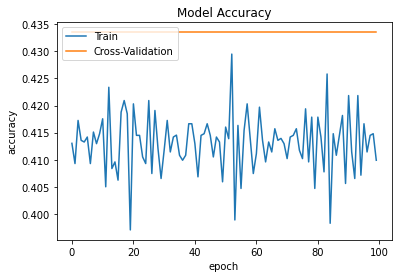

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
plt.show()

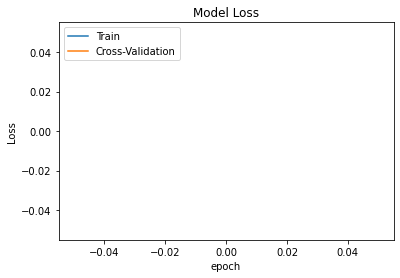

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
plt.show()

In [23]:
print("Train Split:")
loss, accuracy = model.evaluate(normalized_train_df, Y_train, verbose = 1)

print("Accuracy: {:5.2f}".format(accuracy))

Train Split:
106/106 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.4132
Accuracy:  0.41


In [24]:
print("Validation Split:")
loss, accuracy = model.evaluate(normalized_validation_df, Y_validation, verbose = 1)

print("Accuracy: {:5.2f}".format(accuracy))

Validation Split:
23/23 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.4335
Accuracy:  0.43


In [25]:
print("Test Split:")
loss, accuracy = model.evaluate(normalized_test_df, Y_test, verbose = 1)

print("Accuracy: {:5.2f}".format(accuracy))

Test Split:
23/23 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.4127
Accuracy:  0.41


[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

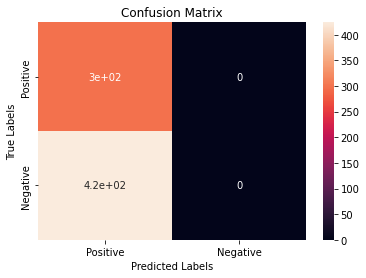

In [26]:
ax = plt.subplot()
predict_results = model.predict(normalized_test_df)

predict_results = (predict_results > 0.5)

cm = confusion_matrix(Y_test, predict_results)

sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

In [27]:
def build_NN2_model(model_optimizer, model_loss):

    #This is the Keras Model 
    model = Sequential()

    model.add(Input(shape = (normalized_train_df.shape[1],)))
    model.add(Dense(32, Activation('relu')))
    model.add(Dense(24, Activation('relu')))
    model.add(Dense(16, Activation('relu')))
    model.add(Dense(8, Activation('relu')))
    model.add(Dense(1, input_shape = (1,), activation = 'sigmoid')) 

    model.compile(
        optimizer = model_optimizer,
        loss = model_loss,
        metrics = ['accuracy']
    )

    return model

In [28]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions
model_loss = losses.BinaryCrossentropy()
learning_rate = 0.01
model_optimizer = optimizers.Adam(
    learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',
)

model = build_NN2_model(model_optimizer=model_optimizer, model_loss=model_loss)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                1888      
                                                                 
 dense_3 (Dense)             (None, 24)                792       
                                                                 
 dense_4 (Dense)             (None, 16)                400       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,225
Trainable params: 3,225
Non-trainable params: 0
_________________________________________________________________


In [29]:
EPOCHS = 10
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/10
33/33 [==============================] - 3s 35ms/step - loss: nan - accuracy: 0.4136 - val_loss: nan - val_accuracy: 0.4335
Epoch 2/10
33/33 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.4102 - val_loss: nan - val_accuracy: 0.4335
Epoch 3/10
33/33 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.4127 - val_loss: nan - val_accuracy: 0.4335
Epoch 4/10
33/33 [==============================] - 1s 18ms/step - loss: nan - accuracy: 0.4148 - val_loss: nan - val_accuracy: 0.4335
Epoch 5/10
33/33 [==============================] - 1s 20ms/step - loss: nan - accuracy: 0.4142 - val_loss: nan - val_accuracy: 0.4335
Epoch 6/10
33/33 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.4053 - val_loss: nan - val_accuracy: 0.4335
Epoch 7/10
33/33 [==============================] - 1s 18ms/step - loss: nan - accuracy: 0.4197 - val_loss: nan - val_accuracy: 0.4335
Epoch 8/10
33/33 [==============================] - 1s 

In [30]:
#https://www.youtube.com/watch?v=p3CcfIjycBA&t=61s
def build_NN3_model():

    #This is the Keras Model 
    model = Sequential()

    model.add(Dense(32, input_dim = len(normalized_train_df.columns), activation = 'relu'))
    model.add(Dropout(0.25))
    #model.add(Dense(32, Activation('relu')))
    #model.add(Dense(24, Activation('relu')))
    #model.add(Dense(16, Activation('relu')))
    #model.add(Dense(8, Activation('relu')))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [31]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN3_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                1888      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
 activation_5 (Activation)   (None, 1)                 0         
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [32]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/100
33/33 [==============================] - 3s 40ms/step - loss: nan - accuracy: 0.4130 - val_loss: nan - val_accuracy: 0.4335
Epoch 2/100
33/33 [==============================] - 1s 22ms/step - loss: nan - accuracy: 0.4111 - val_loss: nan - val_accuracy: 0.4335
Epoch 3/100
33/33 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.4148 - val_loss: nan - val_accuracy: 0.4335
Epoch 4/100
33/33 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.4078 - val_loss: nan - val_accuracy: 0.4335
Epoch 5/100
33/33 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.4191 - val_loss: nan - val_accuracy: 0.4335
Epoch 6/100
33/33 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.4081 - val_loss: nan - val_accuracy: 0.4335
Epoch 7/100
33/33 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.4200 - val_loss: nan - val_accuracy: 0.4335
Epoch 8/100
33/33 [=============================

In [33]:
#https://www.youtube.com/watch?v=p3CcfIjycBA&t=61s
def build_NN4_model():

    #This is the Keras Model 
    model = Sequential()

    model.add(Dense(128, input_dim = len(normalized_train_df.columns), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1)) 
    model.add(Activation('sigmoid'))  
    
    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
    )

    return model

In [34]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN4_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               7552      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 activation_6 (Activation)   (None, 64)                0         
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 activation_7 (Activation)   (None, 32)               

In [35]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/100
33/33 [==============================] - 4s 48ms/step - loss: nan - accuracy: 0.4145 - val_loss: nan - val_accuracy: 0.4335
Epoch 2/100
33/33 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.4130 - val_loss: nan - val_accuracy: 0.4335
Epoch 3/100
33/33 [==============================] - 1s 24ms/step - loss: nan - accuracy: 0.4130 - val_loss: nan - val_accuracy: 0.4335
Epoch 4/100
33/33 [==============================] - 1s 20ms/step - loss: nan - accuracy: 0.4121 - val_loss: nan - val_accuracy: 0.4335
Epoch 5/100
33/33 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.4111 - val_loss: nan - val_accuracy: 0.4335
Epoch 6/100
33/33 [==============================] - 1s 20ms/step - loss: nan - accuracy: 0.4215 - val_loss: nan - val_accuracy: 0.4335
Epoch 7/100
33/33 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.4041 - val_loss: nan - val_accuracy: 0.4335
Epoch 8/100
33/33 [=============================

In [36]:
#https://www.youtube.com/watch?v=WakvH7oMvPw
#have/had no clue what was going on, what could be the problem to the model
#no where to even think about trying to get to solve this problem
#Watched vid and says that regression problems are hard to get working
#because the nature of the problem leaves you prone to exploding gradients dilemma
#Says logistic regression problems are prone to exploding gradients problem
#generally, im thinking that if you send the neural network as much info as possible, then it will work better
#just throwing the NN as much info as possible jumbled up and just expecting it to be solved will not ever work, even in this situation
def build_NN5_model():

    #This is the Keras Model 
    model = Sequential()
    model.add(Dense(1024, input_shape = (normalized_train_df.shape[1],)))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    sgd = optimizers.SGD(learning_rate = 0.01, nesterov = True)

    model.compile(
        loss = 'mean_absolute_error',
        optimizer = sgd,
        metrics = ['accuracy']
    )
    return model

In [37]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN4_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               7552      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 activation_12 (Activation)  (None, 64)                0         
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 activation_13 (Activation)  (None, 32)               

In [38]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/100
33/33 [==============================] - 4s 45ms/step - loss: nan - accuracy: 0.4148 - val_loss: nan - val_accuracy: 0.4335
Epoch 2/100
33/33 [==============================] - 1s 29ms/step - loss: nan - accuracy: 0.4139 - val_loss: nan - val_accuracy: 0.4335
Epoch 3/100
33/33 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.4096 - val_loss: nan - val_accuracy: 0.4335
Epoch 4/100
33/33 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.4117 - val_loss: nan - val_accuracy: 0.4335
Epoch 5/100
33/33 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.4169 - val_loss: nan - val_accuracy: 0.4335
Epoch 6/100
33/33 [==============================] - 1s 25ms/step - loss: nan - accuracy: 0.4142 - val_loss: nan - val_accuracy: 0.4335
Epoch 7/100
33/33 [==============================] - 1s 29ms/step - loss: nan - accuracy: 0.4133 - val_loss: nan - val_accuracy: 0.4335
Epoch 8/100
33/33 [=============================

In [39]:
df_7 = pd.DataFrame(UFC_Data, columns = ["age_dif", "win_streak_dif", "avg_td_dif", "Winner_Categorized"])

In [40]:
train_df_7, test_df_7 = train_test_split(df_7, test_size = 0.3)
test_df_7, validation_df_7 = train_test_split(test_df_7, test_size = 0.5)
print("Training Dataset Shape: ", train_df_7.shape)
print("Validation Dataset Shape: ", validation_df_7.shape)
print("Test Dataset Shape: ", test_df_7.shape)

Training Dataset Shape:  (3369, 4)
Validation Dataset Shape:  (722, 4)
Test Dataset Shape:  (722, 4)


In [41]:
Y_train_7 = train_df_7.pop('Winner_Categorized')
Y_validation_7 = validation_df_7.pop('Winner_Categorized')
Y_test_7 = test_df_7.pop('Winner_Categorized')

In [42]:
#Class for him is Winner_Categorized for us
train_stats_7 = train_df_7.describe()
#train_stats_7 = train_stats_7.drop(columns = ['Winner_Categorized'])
train_stats_7 = train_stats_7.transpose()

def norm_7(x):
    return (x - train_stats_7['mean']) / train_stats_7['std']

normalized_train_df_7 = norm_7(train_df_7)
normalized_test_df_7 = norm_7(test_df_7)
normalized_validation_df_7 = norm_7(validation_df_7)

In [43]:
print("Train/Validation/Test Features (DataFrame 7)")
print("Train: ", normalized_train_df_7.shape)
print("Validation: ", normalized_validation_df_7.shape)
print("Test: ", normalized_test_df_7.shape)

print("\nTrain/Validation/Test Labels (DataFrame 7)")
print("Train: ", Y_train_7.shape)
print("Validation: ", Y_validation_7.shape)
print("Test: ", Y_test_7.shape)

Train/Validation/Test Features (DataFrame 7)
Train:  (3369, 3)
Validation:  (722, 3)
Test:  (722, 3)

Train/Validation/Test Labels (DataFrame 7)
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [44]:
def build_NN5_model():

    #This is the Keras Model 
    model = Sequential()
    model.add(Dense(1024, input_shape = (normalized_train_df_7.shape[1],)))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    sgd = optimizers.SGD(learning_rate = 0.01, nesterov = True)

    model.compile(
        loss = 'mean_absolute_error',
        optimizer = sgd,
        metrics = ['accuracy']
    )
    return model

In [45]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN5_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1024)              4096      
                                                                 
 activation_18 (Activation)  (None, 1024)              0         
                                                                 
 dropout_13 (Dropout)        (None, 1024)              0         
                                                                 
 dense_24 (Dense)            (None, 512)               524800    
                                                                 
 activation_19 (Activation)  (None, 512)               0         
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 256)              

In [46]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df_7,
        Y_train_7,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df_7.shape[0] / batch_sz),
        validation_data = (normalized_validation_df_7, Y_validation_7),
    )

Epoch 1/100
33/33 [==============================] - 3s 33ms/step - loss: 0.5660 - accuracy: 0.4136 - val_loss: 0.5553 - val_accuracy: 0.4058
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 0.5325 - accuracy: 0.4258 - val_loss: 0.5175 - val_accuracy: 0.4363
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: 0.4995 - accuracy: 0.4894 - val_loss: 0.4836 - val_accuracy: 0.5416
Epoch 4/100
33/33 [==============================] - 1s 20ms/step - loss: 0.4762 - accuracy: 0.5681 - val_loss: 0.4606 - val_accuracy: 0.5789
Epoch 5/100
33/33 [==============================] - 1s 18ms/step - loss: 0.4556 - accuracy: 0.5876 - val_loss: 0.4485 - val_accuracy: 0.5983
Epoch 6/100
33/33 [==============================] - 1s 18ms/step - loss: 0.4551 - accuracy: 0.5840 - val_loss: 0.4416 - val_accuracy: 0.5983
Epoch 7/100
33/33 [==============================] - 1s 18ms/step - loss: 0.4535 - accuracy: 0.5763 - val_loss: 0.4367 - val_accuracy: 0.5983
Epoch 

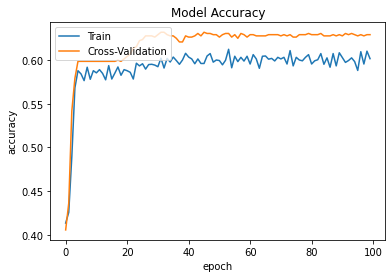

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
plt.show()

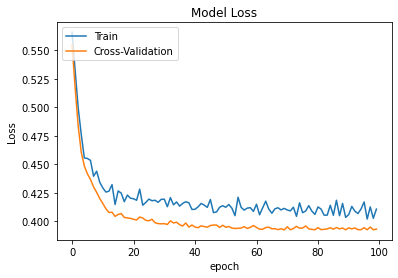

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
plt.show()

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

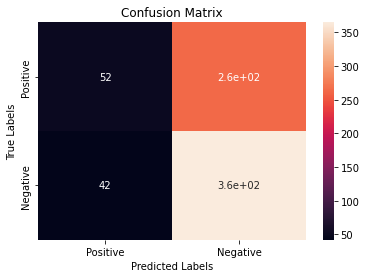

In [49]:
ax = plt.subplot()
predict_results = model.predict(normalized_test_df_7)
#print(predict_results)
predict_results = (predict_results > 0.5).astype(int)
#print(predict_results)
#print(Y_test_7)
cm = confusion_matrix(Y_test_7, predict_results)

sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

In [50]:
def norm(x, train_stats):
    return (x - train_stats['mean']) / train_stats['std']

def split_and_normalize(df):
    train_df, test_df = train_test_split(df, test_size = 0.3)
    test_df, validation_df = train_test_split(test_df, test_size = 0.5)
    train_label = train_df.pop('Winner_Categorized')
    validation_label = validation_df.pop('Winner_Categorized')
    test_label = test_df.pop('Winner_Categorized')
    train_stats = train_df.describe()
    train_stats = train_stats.transpose()
    normalized_train_df = norm(train_df, train_stats)
    normalized_test_df = norm(test_df, train_stats)
    normalized_validation_df = norm(validation_df, train_stats)
    return normalized_train_df, normalized_validation_df, normalized_test_df, train_label, validation_label, test_label

def show_accuracy_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
    plt.show()

def show_loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
    plt.show()

def accuracy_loss_measurements():
    print("\n")
    loss, accuracy = model.evaluate(normalized_train_df, train_label)
    print("Training Accuracy (Final Model): {:5.3f}".format(accuracy))
    print("Training Loss (Final Model): {:5.3f}".format(loss))

    print("\n")
    loss, accuracy = model.evaluate(normalized_validation_df, validation_label)
    print("Validation Accuracy (Final Model): {:5.3f}".format(accuracy))
    print("Validation Loss (Final Model): {:5.3f}".format(loss))

    print("\n")
    loss, accuracy = model.evaluate(normalized_test_df, test_label)
    print("Test Accuracy (Final Model): {:5.3f}".format(accuracy))
    print("Test Loss (Final Model): {:5.3f}".format(loss))

def train_validation_test_shape():
    print("\nTrain/Validation/Test Features")
    print("Train: ", normalized_train_df.shape)
    print("Validation: ", normalized_validation_df.shape)
    print("Test: ", normalized_test_df.shape)

    print("\nTrain/Validation/Test Labels")
    print("Train: ", Y_train.shape)
    print("Validation: ", Y_validation.shape)
    print("Test: ", Y_test.shape)

def show_confusion_matrix(test_set_x, test_set_y):
    ax = plt.subplot()
    predict_results = model.predict(test_set_x)

    predict_results = (predict_results > 0.5)

    cm = confusion_matrix(test_set_y, predict_results)

    sns.heatmap(cm, annot = True, ax = ax)

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Positive', 'Negative'])
    ax.yaxis.set_ticklabels(['Positive', 'Negative'])

In [51]:
normalized_train_df, normalized_validation_df, normalized_test_df, train_label, validation_label, test_label = split_and_normalize(df)

print("\nTrain/Validation/Test Features")
print("Train: ", normalized_train_df.shape)
print("Validation: ", normalized_validation_df.shape)
print("Test: ", normalized_test_df.shape)

print("\nTrain/Validation/Test Labels")
print("Train: ", Y_train.shape)
print("Validation: ", Y_validation.shape)
print("Test: ", Y_test.shape)


Train/Validation/Test Features
Train:  (3369, 58)
Validation:  (722, 58)
Test:  (722, 58)

Train/Validation/Test Labels
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [52]:
normalized_train_df, normalized_validation_df, normalized_test_df, train_label, validation_label, test_label = split_and_normalize(df_7)
train_validation_test_shape()


Train/Validation/Test Features
Train:  (3369, 3)
Validation:  (722, 3)
Test:  (722, 3)

Train/Validation/Test Labels
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [53]:
def build_NN6_model():

    #This is the Keras Model 
    model = Sequential()
    model.add(Dense(1024, input_shape = (normalized_train_df.shape[1],)))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    sgd = optimizers.SGD(learning_rate = 0.01, nesterov = True)

    model.compile(
        loss = 'mean_absolute_error',
        optimizer = sgd,
        metrics = ['accuracy']
    )
    return model

In [54]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN6_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 1024)              4096      
                                                                 
 activation_21 (Activation)  (None, 1024)              0         
                                                                 
 dropout_16 (Dropout)        (None, 1024)              0         
                                                                 
 dense_28 (Dense)            (None, 512)               524800    
                                                                 
 activation_22 (Activation)  (None, 512)               0         
                                                                 
 dropout_17 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)              

In [55]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history_6 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
33/33 [==============================] - 3s 39ms/step - loss: 0.5679 - accuracy: 0.4121 - val_loss: 0.5636 - val_accuracy: 0.3823
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 0.5296 - accuracy: 0.4329 - val_loss: 0.5136 - val_accuracy: 0.4294
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: 0.4955 - accuracy: 0.5102 - val_loss: 0.4741 - val_accuracy: 0.5859
Epoch 4/100
33/33 [==============================] - 1s 21ms/step - loss: 0.4698 - accuracy: 0.5638 - val_loss: 0.4489 - val_accuracy: 0.6066
Epoch 5/100
33/33 [==============================] - 1s 21ms/step - loss: 0.4599 - accuracy: 0.5791 - val_loss: 0.4386 - val_accuracy: 0.6191
Epoch 6/100
33/33 [==============================] - 1s 20ms/step - loss: 0.4487 - accuracy: 0.5931 - val_loss: 0.4291 - val_accuracy: 0.6191
Epoch 7/100
33/33 [==============================] - 1s 21ms/step - loss: 0.4489 - accuracy: 0.5861 - val_loss: 0.4223 - val_accuracy: 0.6191
Epoch 

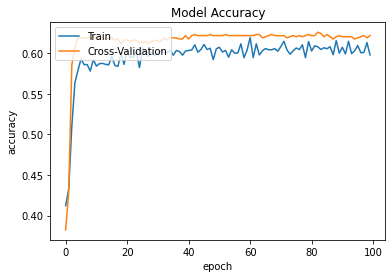

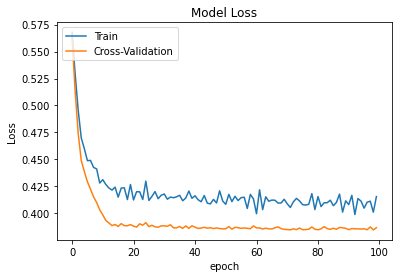



106/106 [==============================] - 1s 10ms/step - loss: 0.4040 - accuracy: 0.6064
Training Accuracy (Final Model): 0.606
Training Loss (Final Model): 0.404


23/23 [==============================] - 0s 10ms/step - loss: 0.3865 - accuracy: 0.6219
Validation Accuracy (Final Model): 0.622
Validation Loss (Final Model): 0.387


23/23 [==============================] - 0s 10ms/step - loss: 0.4396 - accuracy: 0.5706
Test Accuracy (Final Model): 0.571
Test Loss (Final Model): 0.440


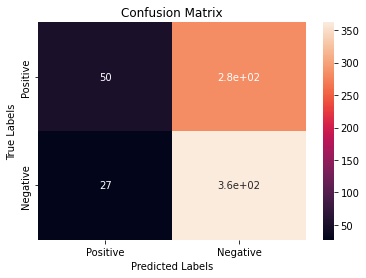

In [56]:
show_accuracy_plot(history_6)
show_loss_plot(history_6)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [57]:
df_8 = pd.DataFrame(df, columns = ['age_dif', 'win_streak_dif', 'avg_td_dif', 'reach_dif', 'loss_dif', 'sig_str_dif', 'total_round_dif', 'Winner_Categorized'])
df_8.head()

,age_dif,win_streak_dif,avg_td_dif,reach_dif,loss_dif,sig_str_dif,total_round_dif,Winner_Categorized
0,-7,0,0.74,-7.62,-4,1.98,-4,0
1,0,0,-0.48,10.16,0,-0.93,0,1
2,-1,0,0.03,5.08,1,2.75,3,0
3,1,0,-2.75,-2.54,0,1.51,0,0
4,2,-1,6.25,-5.08,-3,-2.63,-24,0


In [58]:
normalized_train_df, normalized_validation_df, normalized_test_df, train_label, validation_label, test_label = split_and_normalize(df_8)
train_validation_test_shape()



Train/Validation/Test Features
Train:  (3369, 7)
Validation:  (722, 7)
Test:  (722, 7)

Train/Validation/Test Labels
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [59]:
def build_NN8_model():

    model = Sequential()

    model.add(Dense(32, input_dim=normalized_train_df.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1)) 
    model.add(Activation('sigmoid'))  
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',             
        metrics=['accuracy']
    )
    return model

In [60]:
#https://stackoverflow.com/questions/55929401/how-to-specify-model-compile-for-binary-crossentropy-activation-sigmoid-and-act
#https://neptune.ai/blog/keras-loss-functions


model = build_NN8_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 32)                256       
                                                                 
 activation_24 (Activation)  (None, 32)                0         
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_32 (Dense)            (None, 16)                528       
                                                                 
 activation_25 (Activation)  (None, 16)                0         
                                                                 
 dropout_20 (Dropout)        (None, 16)                0         
                                                                 
 dense_33 (Dense)            (None, 1)                

In [61]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history_8 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
33/33 [==============================] - 3s 35ms/step - loss: 0.7379 - accuracy: 0.5321 - val_loss: 0.6914 - val_accuracy: 0.5540
Epoch 2/100
33/33 [==============================] - 1s 22ms/step - loss: 0.7084 - accuracy: 0.5534 - val_loss: 0.6849 - val_accuracy: 0.5873
Epoch 3/100
33/33 [==============================] - 1s 22ms/step - loss: 0.7037 - accuracy: 0.5531 - val_loss: 0.6813 - val_accuracy: 0.5859
Epoch 4/100
33/33 [==============================] - 1s 23ms/step - loss: 0.6932 - accuracy: 0.5558 - val_loss: 0.6792 - val_accuracy: 0.5900
Epoch 5/100
33/33 [==============================] - 1s 21ms/step - loss: 0.6840 - accuracy: 0.5803 - val_loss: 0.6777 - val_accuracy: 0.5845
Epoch 6/100
33/33 [==============================] - 1s 20ms/step - loss: 0.6886 - accuracy: 0.5785 - val_loss: 0.6769 - val_accuracy: 0.5914
Epoch 7/100
33/33 [==============================] - 1s 19ms/step - loss: 0.6803 - accuracy: 0.5834 - val_loss: 0.6760 - val_accuracy: 0.5873
Epoch 

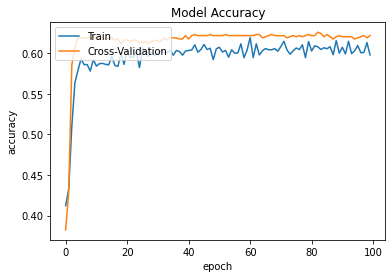

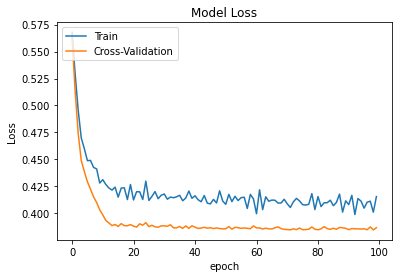



106/106 [==============================] - 1s 10ms/step - loss: 0.6553 - accuracy: 0.6198
Training Accuracy (Final Model): 0.620
Training Loss (Final Model): 0.655


23/23 [==============================] - 0s 10ms/step - loss: 0.6709 - accuracy: 0.5762
Validation Accuracy (Final Model): 0.576
Validation Loss (Final Model): 0.671


23/23 [==============================] - 0s 10ms/step - loss: 0.6711 - accuracy: 0.5997
Test Accuracy (Final Model): 0.600
Test Loss (Final Model): 0.671


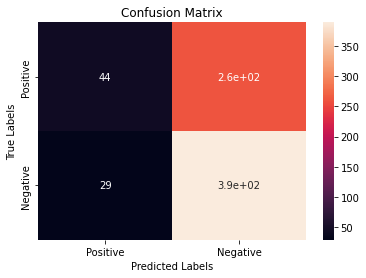

In [62]:
show_accuracy_plot(history_6)
show_loss_plot(history_6)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [63]:
def build_NN9_model():

    model = Sequential()

    model.add(Dense(24, input_dim=normalized_train_df.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(1)) 
    model.add(Activation('sigmoid'))  
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',             
        metrics=['accuracy']
    )
    return model

In [64]:
model = build_NN9_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 24)                192       
                                                                 
 activation_27 (Activation)  (None, 24)                0         
                                                                 
 dropout_21 (Dropout)        (None, 24)                0         
                                                                 
 dense_35 (Dense)            (None, 16)                400       
                                                                 
 activation_28 (Activation)  (None, 16)                0         
                                                                 
 dropout_22 (Dropout)        (None, 16)                0         
                                                                 
 dense_36 (Dense)            (None, 1)                

In [65]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history_9 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
33/33 [==============================] - 3s 37ms/step - loss: 0.6957 - accuracy: 0.5573 - val_loss: 0.6770 - val_accuracy: 0.5873
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 0.6967 - accuracy: 0.5705 - val_loss: 0.6737 - val_accuracy: 0.5789
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: 0.6798 - accuracy: 0.5879 - val_loss: 0.6709 - val_accuracy: 0.5831
Epoch 4/100
33/33 [==============================] - 1s 21ms/step - loss: 0.6719 - accuracy: 0.5962 - val_loss: 0.6684 - val_accuracy: 0.5817
Epoch 5/100
33/33 [==============================] - 1s 21ms/step - loss: 0.6696 - accuracy: 0.5987 - val_loss: 0.6690 - val_accuracy: 0.5859
Epoch 6/100
33/33 [==============================] - 1s 21ms/step - loss: 0.6662 - accuracy: 0.6045 - val_loss: 0.6678 - val_accuracy: 0.5831
Epoch 7/100
33/33 [==============================] - 1s 21ms/step - loss: 0.6692 - accuracy: 0.5913 - val_loss: 0.6685 - val_accuracy: 0.5803
Epoch 

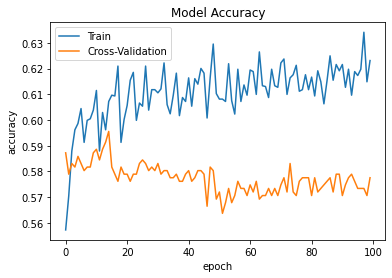

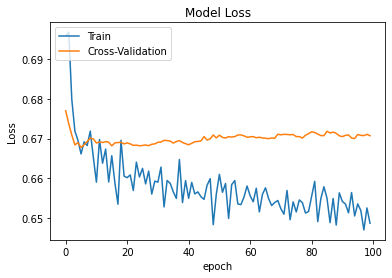



106/106 [==============================] - 1s 10ms/step - loss: 0.6450 - accuracy: 0.6322
Training Accuracy (Final Model): 0.632
Training Loss (Final Model): 0.645


23/23 [==============================] - 0s 11ms/step - loss: 0.6707 - accuracy: 0.5776
Validation Accuracy (Final Model): 0.578
Validation Loss (Final Model): 0.671


23/23 [==============================] - 0s 10ms/step - loss: 0.6735 - accuracy: 0.5942
Test Accuracy (Final Model): 0.594
Test Loss (Final Model): 0.674


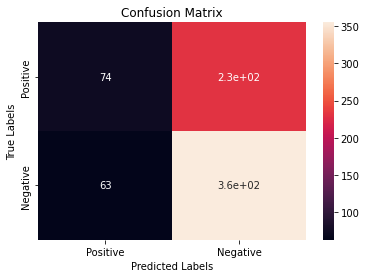

In [66]:
show_accuracy_plot(history_9)
show_loss_plot(history_9)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [67]:
#increased dropout, node count
#decreased batch size
def build_NN10_model():

    model = Sequential()

    model.add(Dense(48, input_dim=normalized_train_df.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.6))

    model.add(Dense(24))
    model.add(Activation('relu'))
    model.add(Dropout(0.6))

    model.add(Dense(1)) 
    model.add(Activation('sigmoid'))  
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',             
        metrics=['accuracy']
    )
    return model

model = build_NN10_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 48)                384       
                                                                 
 activation_30 (Activation)  (None, 48)                0         
                                                                 
 dropout_23 (Dropout)        (None, 48)                0         
                                                                 
 dense_38 (Dense)            (None, 24)                1176      
                                                                 
 activation_31 (Activation)  (None, 24)                0         
                                                                 
 dropout_24 (Dropout)        (None, 24)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                

In [68]:
EPOCHS = 100
batch_sz = 75
with tf.device('/GPU:0'):
    history_10 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
44/44 [==============================] - 3s 32ms/step - loss: 0.7547 - accuracy: 0.4970 - val_loss: 0.6832 - val_accuracy: 0.5845
Epoch 2/100
44/44 [==============================] - 1s 20ms/step - loss: 0.7005 - accuracy: 0.5452 - val_loss: 0.6793 - val_accuracy: 0.5748
Epoch 3/100
44/44 [==============================] - 1s 21ms/step - loss: 0.6924 - accuracy: 0.5604 - val_loss: 0.6773 - val_accuracy: 0.5748
Epoch 4/100
44/44 [==============================] - 1s 17ms/step - loss: 0.6915 - accuracy: 0.5795 - val_loss: 0.6755 - val_accuracy: 0.5734
Epoch 5/100
44/44 [==============================] - 1s 20ms/step - loss: 0.6838 - accuracy: 0.5765 - val_loss: 0.6757 - val_accuracy: 0.5734
Epoch 6/100
44/44 [==============================] - 1s 20ms/step - loss: 0.6768 - accuracy: 0.5832 - val_loss: 0.6747 - val_accuracy: 0.5748
Epoch 7/100
44/44 [==============================] - 1s 21ms/step - loss: 0.6792 - accuracy: 0.5856 - val_loss: 0.6744 - val_accuracy: 0.5706
Epoch 

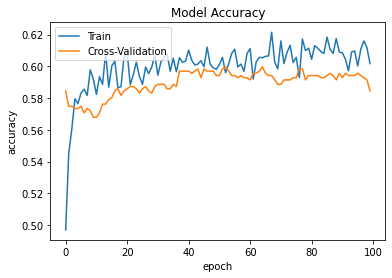

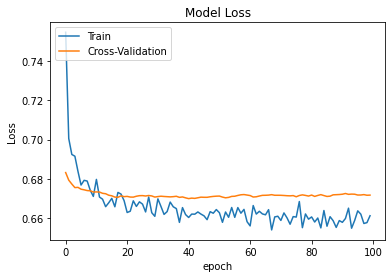



106/106 [==============================] - 1s 10ms/step - loss: 0.6545 - accuracy: 0.6198
Training Accuracy (Final Model): 0.620
Training Loss (Final Model): 0.655


23/23 [==============================] - 0s 10ms/step - loss: 0.6717 - accuracy: 0.5845
Validation Accuracy (Final Model): 0.584
Validation Loss (Final Model): 0.672


23/23 [==============================] - 0s 11ms/step - loss: 0.6698 - accuracy: 0.6025
Test Accuracy (Final Model): 0.602
Test Loss (Final Model): 0.670


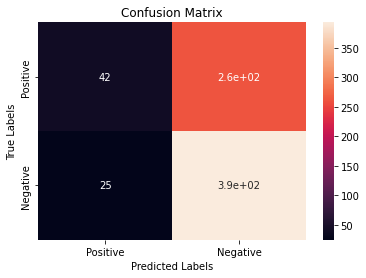

In [69]:
show_accuracy_plot(history_10)
show_loss_plot(history_10)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [70]:
def build_NN11_model():

    model = Sequential()
    model.add(Dense(1024, input_dim=normalized_train_df.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    sgd = optimizers.SGD(learning_rate = 0.01, nesterov = True)

    model.compile(
        loss = 'mean_absolute_error',
        optimizer = sgd,
        metrics = ['accuracy']
    )
    return model

model = build_NN11_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 1024)              8192      
                                                                 
 activation_33 (Activation)  (None, 1024)              0         
                                                                 
 dropout_25 (Dropout)        (None, 1024)              0         
                                                                 
 dense_41 (Dense)            (None, 512)               524800    
                                                                 
 activation_34 (Activation)  (None, 512)               0         
                                                                 
 dropout_26 (Dropout)        (None, 512)               0         
                                                                 
 dense_42 (Dense)            (None, 256)             

In [71]:
EPOCHS = 100
batch_sz = 75
with tf.device('/GPU:0'):
    history_11 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
44/44 [==============================] - 3s 30ms/step - loss: 0.5512 - accuracy: 0.4197 - val_loss: 0.5105 - val_accuracy: 0.4668
Epoch 2/100
44/44 [==============================] - 1s 20ms/step - loss: 0.4882 - accuracy: 0.5216 - val_loss: 0.4747 - val_accuracy: 0.5582
Epoch 3/100
44/44 [==============================] - 1s 19ms/step - loss: 0.4665 - accuracy: 0.5774 - val_loss: 0.4667 - val_accuracy: 0.5623
Epoch 4/100
44/44 [==============================] - 1s 20ms/step - loss: 0.4519 - accuracy: 0.5911 - val_loss: 0.4609 - val_accuracy: 0.5679
Epoch 5/100
44/44 [==============================] - 1s 20ms/step - loss: 0.4495 - accuracy: 0.5871 - val_loss: 0.4521 - val_accuracy: 0.5748
Epoch 6/100
44/44 [==============================] - 1s 20ms/step - loss: 0.4436 - accuracy: 0.5865 - val_loss: 0.4477 - val_accuracy: 0.5776
Epoch 7/100
44/44 [==============================] - 1s 20ms/step - loss: 0.4390 - accuracy: 0.5886 - val_loss: 0.4437 - val_accuracy: 0.5776
Epoch 

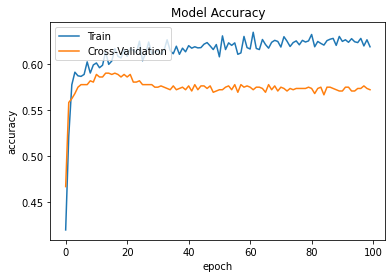

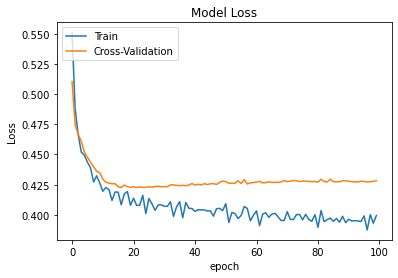



106/106 [==============================] - 1s 10ms/step - loss: 0.3862 - accuracy: 0.6302
Training Accuracy (Final Model): 0.630
Training Loss (Final Model): 0.386


23/23 [==============================] - 0s 10ms/step - loss: 0.4283 - accuracy: 0.5720
Validation Accuracy (Final Model): 0.572
Validation Loss (Final Model): 0.428


23/23 [==============================] - 0s 10ms/step - loss: 0.4192 - accuracy: 0.5970
Test Accuracy (Final Model): 0.597
Test Loss (Final Model): 0.419


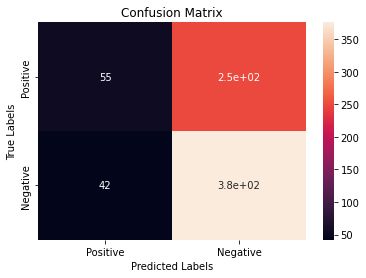

In [72]:
show_accuracy_plot(history_11)
show_loss_plot(history_11)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [73]:
def build_NN13_model():
    model = Sequential()
    model.add(Dense(16, input_dim=normalized_train_df.shape[1], activation='relu')) 
    model.add(Dropout(0.2))
    model.add(Dense(1)) 
    model.add(Activation('sigmoid'))  
    model.compile(loss='binary_crossentropy',
        optimizer='adam',             #also try adam
        metrics=['accuracy']
    )

    return model

model = build_NN13_model()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 16)                128       
                                                                 
 dropout_28 (Dropout)        (None, 16)                0         
                                                                 
 dense_45 (Dense)            (None, 1)                 17        
                                                                 
 activation_36 (Activation)  (None, 1)                 0         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [74]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history_13 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
33/33 [==============================] - 3s 35ms/step - loss: 0.7494 - accuracy: 0.4970 - val_loss: 0.7184 - val_accuracy: 0.5166
Epoch 2/100
33/33 [==============================] - 1s 19ms/step - loss: 0.7105 - accuracy: 0.5393 - val_loss: 0.7006 - val_accuracy: 0.5582
Epoch 3/100
33/33 [==============================] - 1s 20ms/step - loss: 0.7014 - accuracy: 0.5555 - val_loss: 0.6937 - val_accuracy: 0.5596
Epoch 4/100
33/33 [==============================] - 1s 20ms/step - loss: 0.6877 - accuracy: 0.5699 - val_loss: 0.6887 - val_accuracy: 0.5637
Epoch 5/100
33/33 [==============================] - 1s 20ms/step - loss: 0.6852 - accuracy: 0.5745 - val_loss: 0.6856 - val_accuracy: 0.5499
Epoch 6/100
33/33 [==============================] - 1s 20ms/step - loss: 0.6905 - accuracy: 0.5693 - val_loss: 0.6837 - val_accuracy: 0.5554
Epoch 7/100
33/33 [==============================] - 1s 20ms/step - loss: 0.6740 - accuracy: 0.5889 - val_loss: 0.6829 - val_accuracy: 0.5596
Epoch 

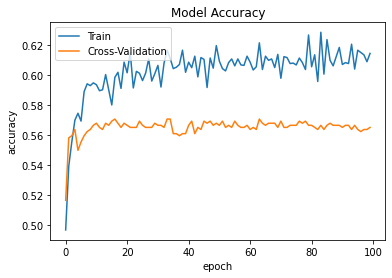

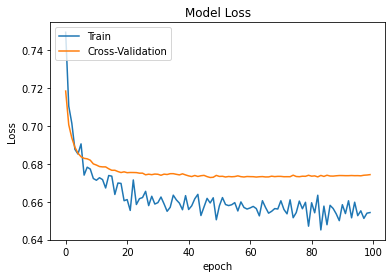



106/106 [==============================] - 1s 9ms/step - loss: 0.6512 - accuracy: 0.6189
Training Accuracy (Final Model): 0.619
Training Loss (Final Model): 0.651


23/23 [==============================] - 0s 9ms/step - loss: 0.6743 - accuracy: 0.5651
Validation Accuracy (Final Model): 0.565
Validation Loss (Final Model): 0.674


23/23 [==============================] - 0s 9ms/step - loss: 0.6759 - accuracy: 0.5942
Test Accuracy (Final Model): 0.594
Test Loss (Final Model): 0.676


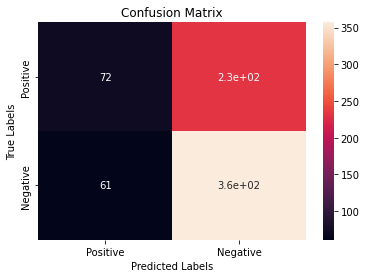

In [75]:
show_accuracy_plot(history_13)
show_loss_plot(history_13)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [76]:
normalized_train_df, normalized_validation_df, normalized_test_df, train_label, validation_label, test_label = split_and_normalize(df_7)
train_validation_test_shape()


Train/Validation/Test Features
Train:  (3369, 3)
Validation:  (722, 3)
Test:  (722, 3)

Train/Validation/Test Labels
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [77]:
model = build_NN13_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 16)                64        
                                                                 
 dropout_29 (Dropout)        (None, 16)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
 activation_37 (Activation)  (None, 1)                 0         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [78]:
EPOCHS = 100
batch_sz = 100
with tf.device('/GPU:0'):
    history_14 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
33/33 [==============================] - 3s 41ms/step - loss: 0.7213 - accuracy: 0.4842 - val_loss: 0.7022 - val_accuracy: 0.5042
Epoch 2/100
33/33 [==============================] - 1s 18ms/step - loss: 0.6936 - accuracy: 0.5512 - val_loss: 0.6905 - val_accuracy: 0.5720
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 0.6834 - accuracy: 0.5846 - val_loss: 0.6850 - val_accuracy: 0.5859
Epoch 4/100
33/33 [==============================] - 1s 22ms/step - loss: 0.6741 - accuracy: 0.5947 - val_loss: 0.6819 - val_accuracy: 0.5859
Epoch 5/100
33/33 [==============================] - 1s 22ms/step - loss: 0.6721 - accuracy: 0.5867 - val_loss: 0.6809 - val_accuracy: 0.5942
Epoch 6/100
33/33 [==============================] - 1s 19ms/step - loss: 0.6684 - accuracy: 0.6011 - val_loss: 0.6800 - val_accuracy: 0.5886
Epoch 7/100
33/33 [==============================] - 1s 19ms/step - loss: 0.6724 - accuracy: 0.5889 - val_loss: 0.6791 - val_accuracy: 0.5886
Epoch 

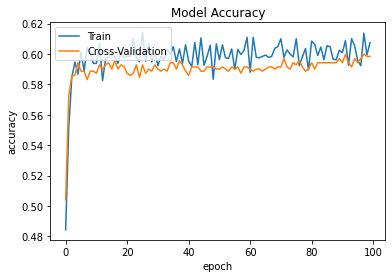

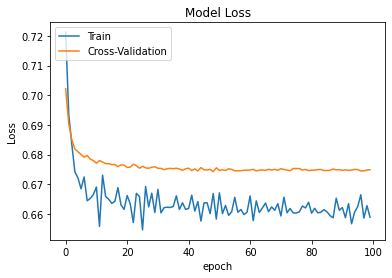



106/106 [==============================] - 1s 9ms/step - loss: 0.6593 - accuracy: 0.6046
Training Accuracy (Final Model): 0.605
Training Loss (Final Model): 0.659


23/23 [==============================] - 0s 9ms/step - loss: 0.6749 - accuracy: 0.5983
Validation Accuracy (Final Model): 0.598
Validation Loss (Final Model): 0.675


23/23 [==============================] - 0s 10ms/step - loss: 0.6655 - accuracy: 0.6066
Test Accuracy (Final Model): 0.607
Test Loss (Final Model): 0.666


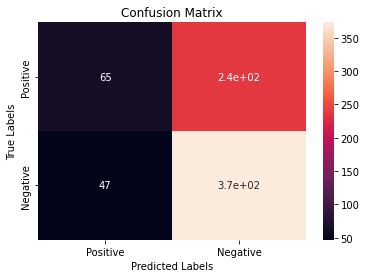

In [79]:
show_accuracy_plot(history_14)
show_loss_plot(history_14)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [80]:
def build_NN16_model():

    #This is the Keras Model 
    model = Sequential()
    model.add(Dense(1024, input_shape = (normalized_train_df.shape[1],)))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    sgd = optimizers.SGD(learning_rate = 0.01, nesterov = True)

    model.compile(
        loss = 'mean_absolute_error',
        optimizer = sgd,
        metrics = ['accuracy']
    )
    return model

model = build_NN16_model()
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 1024)              4096      
                                                                 
 activation_38 (Activation)  (None, 1024)              0         
                                                                 
 dropout_30 (Dropout)        (None, 1024)              0         
                                                                 
 dense_49 (Dense)            (None, 512)               524800    
                                                                 
 activation_39 (Activation)  (None, 512)               0         
                                                                 
 dropout_31 (Dropout)        (None, 512)               0         
                                                                 
 dense_50 (Dense)            (None, 256)             

In [84]:
train_validation_test_shape()


Train/Validation/Test Features
Train:  (3369, 3)
Validation:  (722, 3)
Test:  (722, 3)

Train/Validation/Test Labels
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [81]:
EPOCHS = 100
batch_sz = 100
#with tf.device('/GPU:0'):
history_16 = model.fit(
        normalized_train_df,
        train_label,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, validation_label),
    )

Epoch 1/100
33/33 [==============================] - 2s 33ms/step - loss: 0.5730 - accuracy: 0.4145 - val_loss: 0.5417 - val_accuracy: 0.4252
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 0.5304 - accuracy: 0.4212 - val_loss: 0.5087 - val_accuracy: 0.4529
Epoch 3/100
33/33 [==============================] - 1s 17ms/step - loss: 0.4927 - accuracy: 0.5072 - val_loss: 0.4811 - val_accuracy: 0.5526
Epoch 4/100
33/33 [==============================] - 1s 20ms/step - loss: 0.4653 - accuracy: 0.5754 - val_loss: 0.4643 - val_accuracy: 0.5776
Epoch 5/100
33/33 [==============================] - 1s 20ms/step - loss: 0.4544 - accuracy: 0.5824 - val_loss: 0.4583 - val_accuracy: 0.5706
Epoch 6/100
33/33 [==============================] - 1s 18ms/step - loss: 0.4422 - accuracy: 0.5944 - val_loss: 0.4519 - val_accuracy: 0.5706
Epoch 7/100
33/33 [==============================] - 1s 15ms/step - loss: 0.4397 - accuracy: 0.5889 - val_loss: 0.4471 - val_accuracy: 0.5706
Epoch 

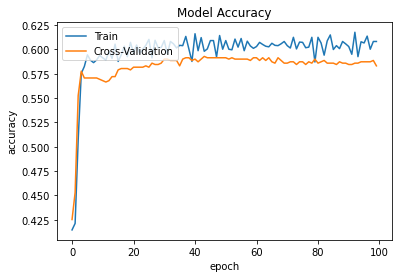

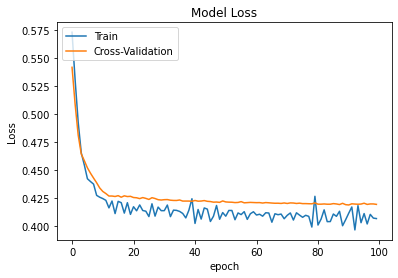



106/106 [==============================] - 1s 9ms/step - loss: 0.4022 - accuracy: 0.6070
Training Accuracy (Final Model): 0.607
Training Loss (Final Model): 0.402


23/23 [==============================] - 0s 10ms/step - loss: 0.4193 - accuracy: 0.5831
Validation Accuracy (Final Model): 0.583
Validation Loss (Final Model): 0.419


23/23 [==============================] - 0s 9ms/step - loss: 0.4071 - accuracy: 0.6122
Test Accuracy (Final Model): 0.612
Test Loss (Final Model): 0.407


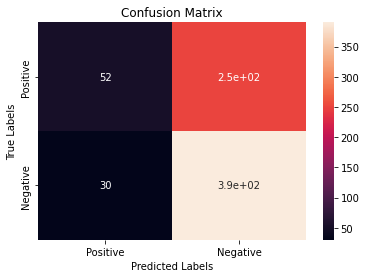

In [82]:
show_accuracy_plot(history_16)
show_loss_plot(history_16)
accuracy_loss_measurements()
show_confusion_matrix(normalized_test_df, test_label)

In [83]:
#"training_model_acc": train_accuracy,
#"test_model_acc": test_accuracy,
loss, train_accuracy = model.evaluate(normalized_train_df, train_label)
loss, test_accuracy = model.evaluate(normalized_test_df, test_label)

model_dir = './UFC_NN_model'
localhost_save_option = tf.saved_model.SaveOptions(experimental_io_device="/job:localhost")
model.save(model_dir, options=localhost_save_option)

data = {
    "training_model_acc": train_accuracy,
    "test_model_acc": test_accuracy,
}
with open('saved_steps_NN.pkl', 'wb') as file:
    pickle.dump(data, file)

23/23 [==============================] - 0s 9ms/step - loss: 0.4071 - accuracy: 0.6122
INFO:tensorflow:Assets written to: ./UFC_NN_model\assets
